##Installation 

In [21]:
#if (!requireNamespace("BiocManager", quietly = TRUE))
    #install.packages("BiocManager")
#BiocManager::install("DESeq2")
#library('DESeq2')
#library(GEOquery)
#library(tidyverse)
#library(CorLevelPlot)
#library(gridExtra)
#library('tximport')
#library(pheatmap)
#library(ggplot2)
#library(plotly)
#library(cluster)
#library(biomaRt)
#library(RColorBrewer)
#library('tibble')
#library(dplyr)

In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("DESeq2")

In [ ]:
library('DESeq2')

In [ ]:
#if (!require("BiocManager", quietly = TRUE))
    #install.packages("BiocManager")

#BiocManager::install("BiocVersion")

In [ ]:
#sessionInfo()

**Loading the countmatrix datasets**

In [3]:
#get countnMatrix dataset
count_matrix = as.matrix(read.csv("/content/mir00.csv", row.names = "Genes"))
#get meta dataset(sample information:studyDesign)
metaData = as.matrix(read.csv("/content/Condition.csv"))

#head(count_matrix) #print the  countnMatrix dataset
#print(metaData) #print the meta datasets


dim(count_matrix)
dim(metaData)

[1] 1881  569

[1] 569   2

In [13]:
head(metaData)

miRNA.AF8.ID,Condition
TCGA.HD.A6I0.11A,Control
TCGA.CV.7438.11A,Control
TCGA.CV.7242.11A,Control
TCGA.CV.6939.11A,Control
TCGA.CV.7183.11A,Control
TCGA.CV.7177.11A,Control


In [5]:
head(count_matrix) #print the  countnMatrix dataset

,TCGA.HD.A6I0.11A,TCGA.CV.7438.11A,TCGA.CV.7242.11A,TCGA.CV.6939.11A,TCGA.CV.7183.11A,TCGA.CV.7177.11A,TCGA.HD.8635.11A,TCGA.CV.7101.11A,TCGA.CV.7091.11A,TCGA.CV.7097.11A,⋯,TCGA.CV.7095.01A,TCGA.CQ.7068.01A,TCGA.BA.A6D8.01A,TCGA.CV.A464.01A,TCGA.CV.6942.01A,TCGA.CV.7180.01A,TCGA.CV.7235.01A,TCGA.HD.A6HZ.01A,TCGA.CV.7422.01A,TCGA.BB.7872.01A
hsa+AC0-let+AC0-7a+AC0-1,12.838941,14.032270,13.327969,12.921343,13.518812,14.072909,13.944910,13.675176,13.374977,13.839932,⋯,13.543232,13.118703,13.137252,13.316571,13.396672,13.290005,14.198898,12.279877,13.192416,13.130257
hsa+AC0-let+AC0-7a+AC0-2,12.831734,14.033051,13.339248,12.916127,13.518252,14.072180,13.952417,13.667171,13.373656,13.832211,⋯,13.541369,13.118204,13.120202,13.299900,13.387428,13.283693,14.191933,12.273364,13.185702,13.121521
hsa+AC0-let+AC0-7a+AC0-3,12.837878,14.042340,13.344346,12.925509,13.522423,14.069446,13.951344,13.677632,13.381600,13.843057,⋯,13.558758,13.127397,13.153147,13.307057,13.405692,13.302822,14.199774,12.297153,13.195477,13.135453
hsa+AC0-let+AC0-7b,12.892818,14.486698,14.378182,13.331798,14.771923,14.454344,14.151560,14.500905,13.780845,14.632260,⋯,14.770954,14.409644,13.632766,14.386398,14.461947,14.458171,14.633410,13.205137,13.812417,15.150798
hsa+AC0-let+AC0-7c,10.636627,12.275873,12.420225,11.525247,12.771939,13.132232,12.138731,12.504534,12.072886,12.830341,⋯,10.817238,11.400640,8.847383,11.466208,10.885724,10.636675,10.984261,8.676062,10.490009,9.137789
hsa+AC0-let+AC0-7d,8.400322,8.116424,8.497391,8.229853,7.589567,8.238781,8.210752,8.176242,8.757844,8.426597,⋯,8.533069,8.199725,9.409515,8.151024,9.372815,8.842743,9.390803,8.717346,8.053852,8.567439


**Importing Datasets into DESeq2**

In [6]:
all(rownames(metaData) %in% colnames(count_matrix))
all(rownames(metaData) == colnames(count_matrix))
all(rownames(metaData) %in% colnames(norm))
all(rownames(metaData) == colnames(norm))

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

In [ ]:
#SummarizedExperiment(assays=list(counts=count_matrix), colData=metadata)

In [7]:
deseq_dataset = DESeqDataSetFromMatrix(countData=round(count_matrix), 
                                  colData=metaData, 
                                  design=~Condition)

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [8]:
print(deseq_dataset)

class: DESeqDataSet 
dim: 1881 569 
metadata(1): version
assays(1): counts
rownames(1881): hsa+AC0-let+AC0-7a+AC0-1 hsa+AC0-let+AC0-7a+AC0-2 ...
  hsa+AC0-mir+AC0-99a hsa+AC0-mir+AC0-99b
rowData names(0):
colnames(569): TCGA.HD.A6I0.11A TCGA.CV.7438.11A ... TCGA.CV.7422.01A
  TCGA.BB.7872.01A
colData names(2): miRNA.AF8.ID Condition


**Condition**

In [9]:
# set control condition as reference
deseq_dataset$Condition = relevel(deseq_dataset$Condition, ref = "Control")

**Exploratory Data Analysis**

In [10]:
#DESeq does:
#estimatesSizeFactors
#estimatesDispersion
#nbinoWaldtest
deseq_dataset = DESeq(deseq_dataset, fitType='mean')

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [11]:
deseq_result = results(deseq_dataset, contrast = c("Condition","Control", "Tumor"))
summary(deseq_result) #overall result statistics from DESeq2


out of 1881 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 128, 6.8%
LFC < 0 (down)     : 32, 1.7%
outliers [1]       : 0, 0%
low counts [2]     : 1012, 54%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [14]:
df_mat = data.matrix(deseq_result)
head(df_mat, 5)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
hsa+AC0-let+AC0-7a+AC0-1,14.20870,0.2646092,0.09224463,2.868559,4.123461e-03,3.079224e-02
hsa+AC0-let+AC0-7a+AC0-2,14.20319,0.2652706,0.09230687,2.873790,4.055782e-03,3.079224e-02
hsa+AC0-let+AC0-7a+AC0-3,14.21421,0.2639885,0.09223520,2.862123,4.208138e-03,3.079224e-02
hsa+AC0-let+AC0-7b,14.89562,0.2220288,0.09111566,2.436780,1.481870e-02,8.254773e-02
hsa+AC0-let+AC0-7c,11.16541,0.4964459,0.09439403,5.259293,1.446100e-07,3.307003e-06


<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">:)</p>
<p class="last"> So as per DESeq, here in our dataset, we got 1429 miRNA/genes with non zero read counts with adjusted p-value < 0.1, LFC > 0 for up-reg and LFC < 0 for down-reg and there are 0 outliers based on cooksCutoff distance threshold and there are nearly 735 low count genes with mean count < 0.</p>
</div>

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">:)</p>
<p class="last"> mean with lowest counts start to filter out genes with low expression in the rows because genes of low expression have very low counts numbers(integer values) statistically much likely to be differentially expressed.</p>
</div>

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">:)</p>
<p class="last">mean counts filter plays a big role to maximize the no of genes that pass the statistical thresholds [up-regulated] if we increase the mean count filter, it will start to filter out genes that are genuinely differentially expressed and that get genes removed from the consideration of S-test which filter out **low counts** rows and left us with few rows out of total rows.</p>
</div>

In [ ]:
#View(deseq_result)
#View(as.data.frame(result_table)

**In this results table:**
<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;"></p>
<p class="last">Each of these columns tells something about the expression of the gene in each given row:</p>
</div>

* **baseMeans:** average normalized counts for the gene across all the samples in the columns(experiment), a gene with baseMEan 0 and less than the threshold is filtered out for all the tests.

* **fold change:** that's the difference between two conditions in our differential gene expression test expressed as a log2 ratio.
for example, if FC is 2 means upregulation is 1 if FC is 4 then the upreg is 2, FC is 8  upreg is 3 and so on.. and same as for -ve FC -2 FC means the upregulation goes down towards the zero.
* **lfcSE:** gives us the idea that how robust the change is so larger the lfcSE is less robust the FC observation is

* **stat:** is the result of the wald test, a test of binomial distribution which uses the mean(basemean) and the dispersion which we estimated when we run the estimate dispersion to see the differences between two conditions and that test-statistics is used to convert into the p-value to see the significant differences. 

The p-values are represented in two ways:

**p-value:** which is the output of raw p-value means is this gene differentially expressed may or may not and 
**padj:** this is a p-value adjusted for multiple hypo-test and this is essential for this kind of analysis because we are applying statistical tests on thousands of or beyond datasets points in one go, so these are the linked hypothesis, therefore, it's very important to we take counts of p-values less than < 0.05 it is sufficient to reject null hypo.
so when we consider which genes are differentially expressed it is the padj columns values that we consider for the analysis.

**Heat-Map**

In [15]:
dim(count_matrix)

[1] 1881  569

In [28]:
vst = varianceStabilizingTransformation(round(count_matrix))
data_for_hm = as.matrix.default(vst[1:1881, 1:569])
dim(data_for_hm)

converting counts to integer mode



[1] 1881  569

In [ ]:
install.packages("pheatmap")
install.packages("RColorBrewer")

png 
  2

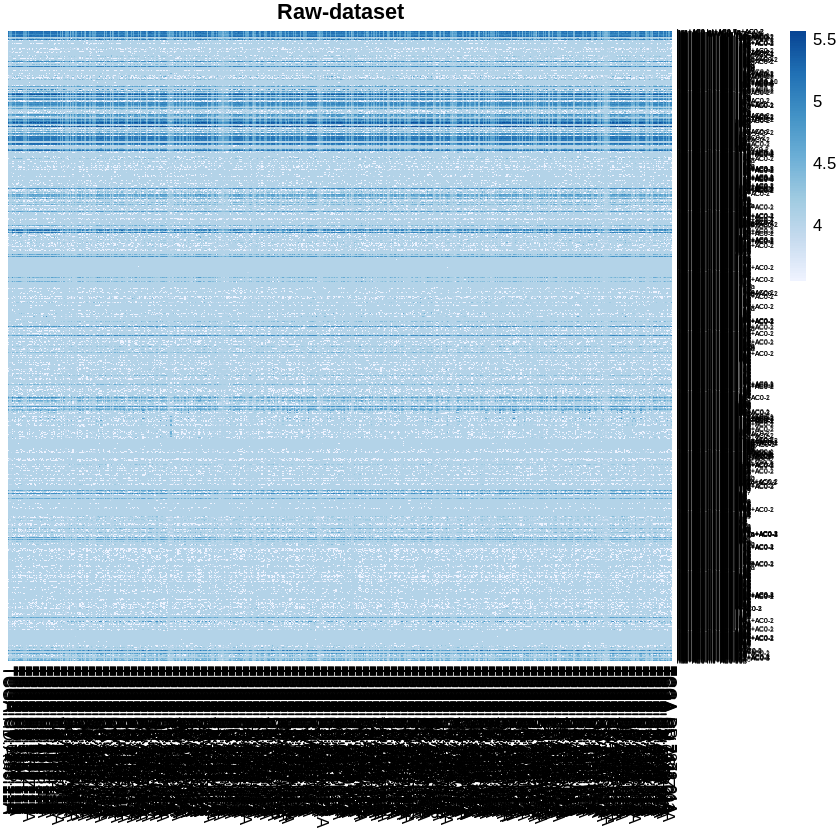

In [30]:
library(pheatmap)
library(RColorBrewer)

greys = colorRampPalette(brewer.pal(9, "Greys"))(100)
pairs = colorRampPalette(brewer.pal(12, "Paired"))(100)
last_scheme = colorRampPalette(brewer.pal(7, "Blues"))(100)

plot = pheatmap(data_for_hm,scale = "none",fontsize_row=4,main = "Raw-dataset",
         color=last_scheme, cutree_cols = 2,cutree_rows = 2,cluster_cols = FALSE,cluster_rows = FALSE)
save_pheatmap_png <- function(x, filename, width=1200, height=1000, res = 150) {
    png(filename, width = width, height = height, res = res)
    grid::grid.newpage()
    grid::grid.draw(x$gtable)
    dev.off()
}
save_pheatmap_png(plot, "rawdata2.png")

converting counts to integer mode



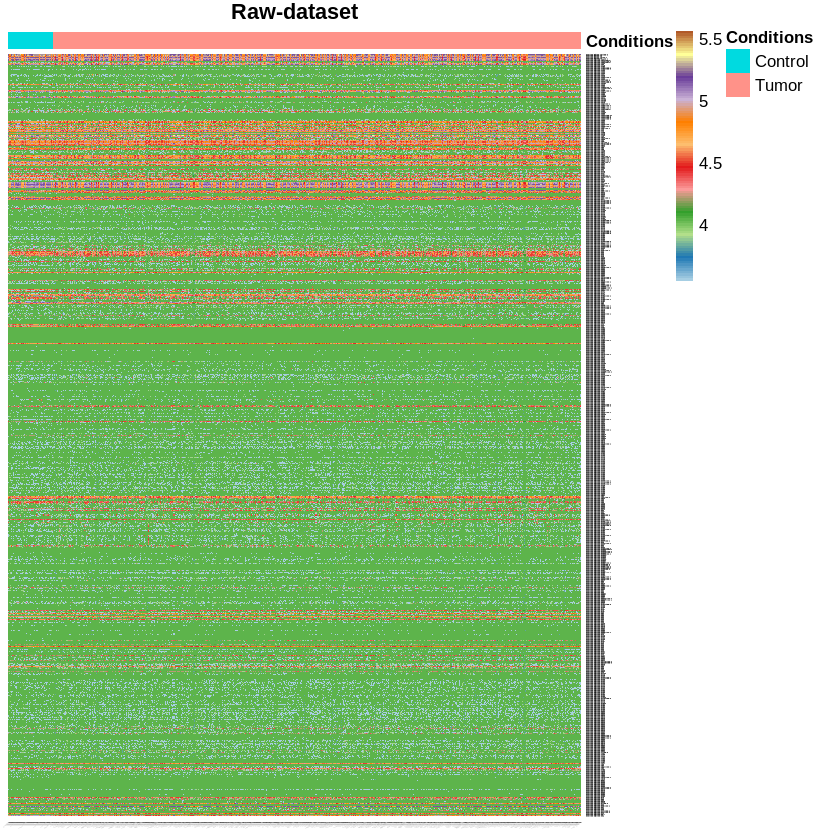

In [31]:
library(pheatmap)
library(RColorBrewer)
smaple_group <- data.frame(Conditions = rep(c("Control", "Tumor"), c(44,525)))
row.names(smaple_group) <- colnames(count_matrix)


vst = varianceStabilizingTransformation(round(count_matrix))
greys = colorRampPalette(brewer.pal(9, "Greys"))(100)
pairs = colorRampPalette(brewer.pal(12, "Paired"))(100)
last_scheme = colorRampPalette((c(7, "red", "blue","green")))(100)
#last_scheme = colorRampPalette(brewer.pal(7, "red", "black", "green"))(100)

pheatmap(data_for_hm,scale = "none",color=pairs, cutree_cols = 2,cutree_rows = 2, 
         main = "Raw-dataset", fontsize_row = 1,fontsize_col = 0.5, 
         legend = T, annotation_col = smaple_group,angle_col = 45,height = 5,width = 6,cluster_cols = FALSE,cluster_rows = FALSE)

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;"></p>
<p class="last">So this is a HeatMap of those differentially expressed genes which looks quite nice as you can see the sample on right clearly up-regulated expression is higher than the sample on the left, and block of the bottom down-regulated genes expression level higher in the right and low on the left side.</p>
</div>

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;"></p>
<p class="last">The way we normally think about heatmap is having columns and rows exactly the same as the matrix.</p>
</div>

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;"></p>
<p class="last">heatmap colours these cells according to the expressions of that gene in particular samples and heatmap also applied clustering over the top of it, and so we end with a dendrogram linking the samples together as well as genes together which have different clusters of genes.</p>
</div>

**PCA-Plot**

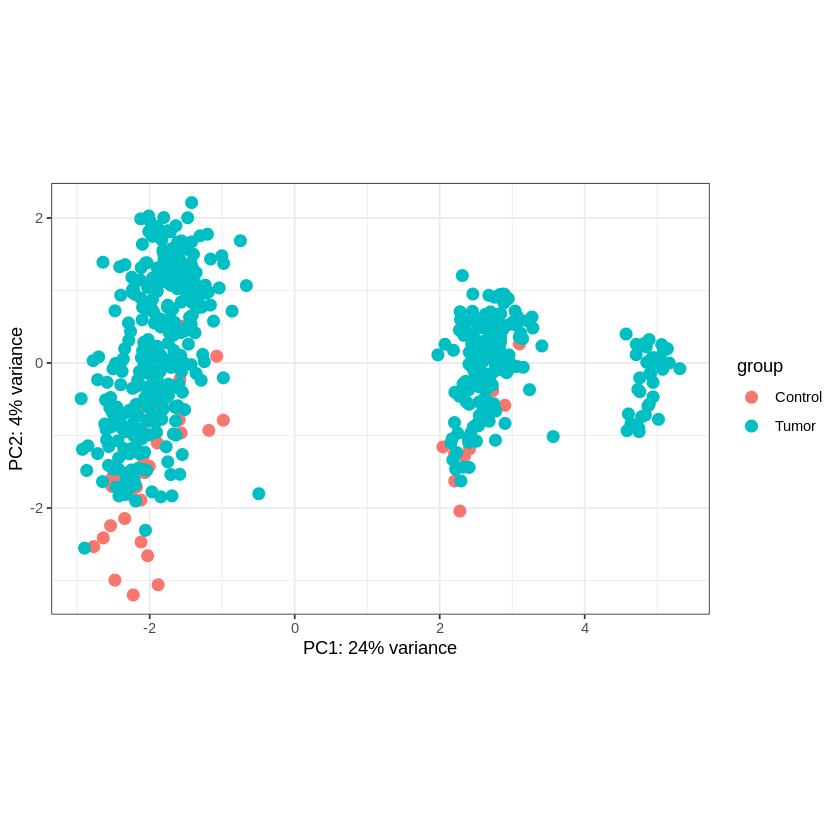

In [22]:
vst = varianceStabilizingTransformation(deseq_dataset)
plotPCA(vst, intgroup=c("Condition"))+theme_bw()

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;"></p>
<p class="last"> Before perfoming PCA we need to transform count datasets using   varianceStabilizingTransformation which gives us the right shape for PCA in order to produce a representation of dataset which is meanable for PCA.</p>
</div>

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;"></p>
<p class="last">The main thing in PCA is to use for bioinformatician is that the closer the two-point is on this plot the most they similar to one another. and this PCA represents the amount of variance in dataest which explains the proportion of the variance in the data. where the PC1 exlains 8% of the variance in the whole dataset. [DESeq2 PCAplot only uses the top 500 most defferentially expressed genes] and PC2 which represents 2% variance.</p>
</div>


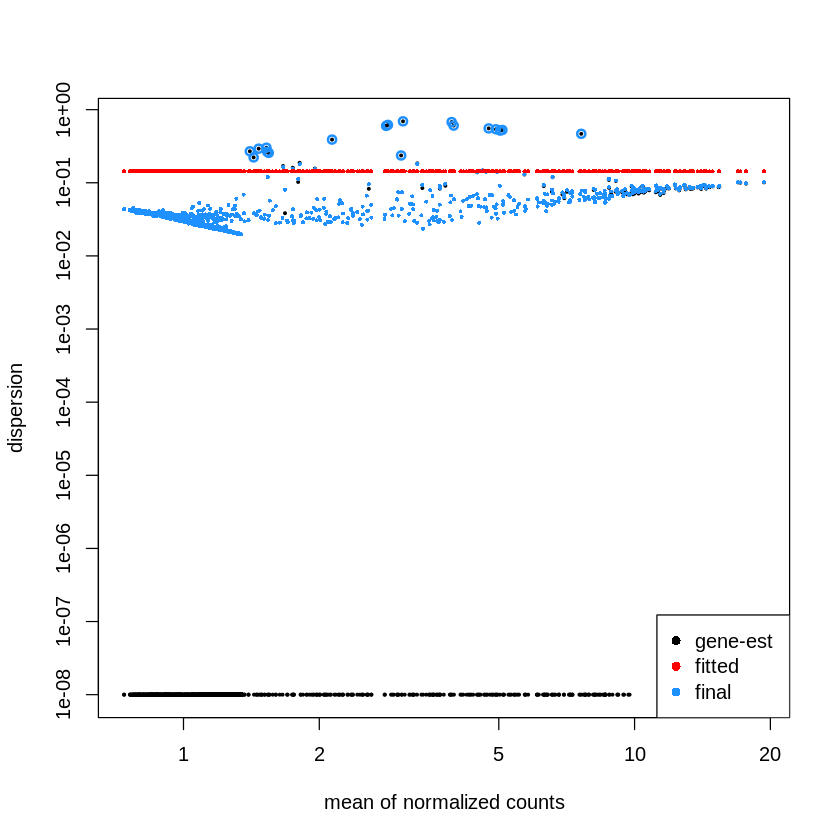

In [23]:
plot1 = plotDispEsts(deseq_dataset)

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;"></p>
<p class="last"> This calculates the gene-wise dispersion estimates for the datasets and applies the shrinkage and gives us final dispersion estimates.</p>
</div>
<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;"></p>
<p class="last"> Normal relationship on RNASeq data: So here mean and variance in RNAseq data are not independent of one another so the variance is not continuous with mean of count data, as mean count from left to right increases and variance goes down.</p>
</div>
<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;"></p>
<p class="last"> Worth noting here is, that the black point is the gene-wise estimates of dispersion so that fresh genes from the total observation dispersion have been estimated.</p>
</div>

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;"></p>
<p class="last"> So mean dispersion with the mean and average dispersion with average counts fitted through the red line and black point shrunk towards the red fitted line [dispersion estimates] so the resulting dispersion estimates gene-wise are than the blue points.</p>
</div>
<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;"></p>
<p class="last"> There are two groups of blue points, one is scattered around the red line and the second scattered around the black point away and from the fitted first blue points, these are actually genes which are considered as outliers in terms of dispersion.</p>
</div>

**Criteria to filter datasets:**
* padj < 0.05
* log2FoldChange > 1 < -1


In [16]:
result_df = as.data.frame(deseq_result) #DESeq dataframe to R-base Dataframe
head(result_df) # result_table is a DataFrame not a data.frame: a base-r dataframe

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hsa+AC0-let+AC0-7a+AC0-1,14.208701,0.26460917,0.09224463,2.8685591,4.123461e-03,3.079224e-02
hsa+AC0-let+AC0-7a+AC0-2,14.203190,0.26527057,0.09230687,2.8737903,4.055782e-03,3.079224e-02
hsa+AC0-let+AC0-7a+AC0-3,14.214212,0.26398846,0.09223520,2.8621228,4.208138e-03,3.079224e-02
hsa+AC0-let+AC0-7b,14.895615,0.22202880,0.09111566,2.4367799,1.481870e-02,8.254773e-02
hsa+AC0-let+AC0-7c,11.165413,0.49644592,0.09439403,5.2592933,1.446100e-07,3.307003e-06
hsa+AC0-let+AC0-7d,9.440057,0.09377513,0.09814829,0.9554433,3.393536e-01,9.999999e-01


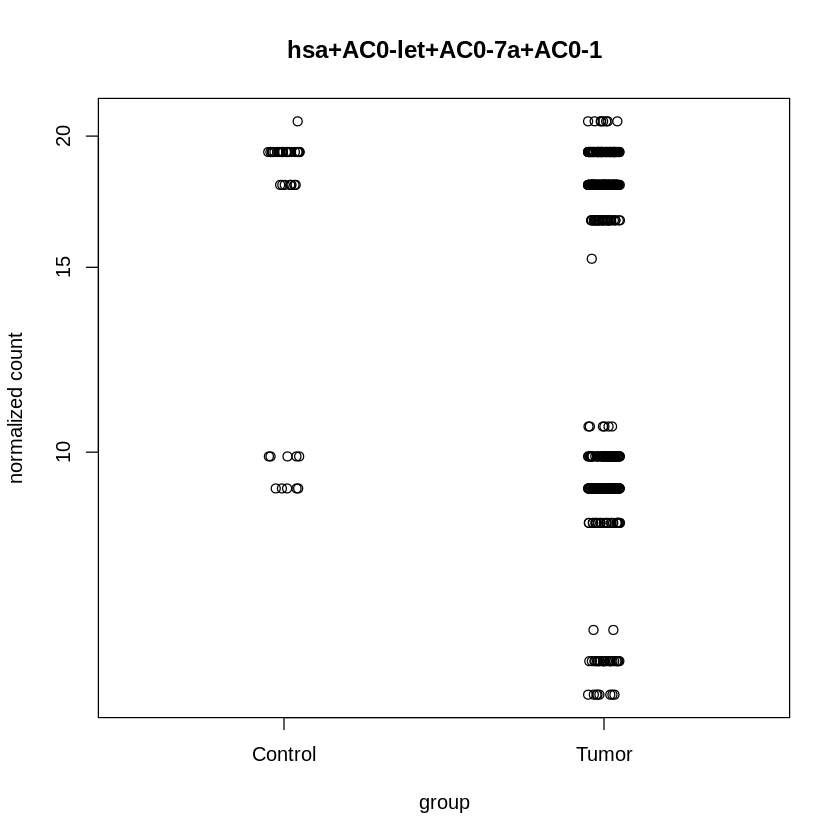

In [25]:
plotCounts(deseq_dataset, gene='hsa+AC0-let+AC0-7a+AC0-1',
           intgroup='Condition')

As per plotCounts graph Ctrl and Tumor having higher outlier can be filtered out by applying cooksCutoff distance.

Three steps to DESeq2 analysis: which will give us all of the genes which pass all the filters.

    estimate size factors (normalisation)
    estimate dispersions
    apply statistics (Wald Test)



Step1: Filter

In [17]:
#complete.cases(result_df)
#sum(complete.cases(result_df))
filter_df1 = result_df[complete.cases(result_df),]
#View(filter_df1) 
dim(filter_df1)

[1] 869   6

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;"></p>
<p class="last"> So here in our datasets out of [1429/. from result statistics DESeq2] nearly 694 data points are true which pass the all the DESeq2 filtters.</p>
</div>

* True: for represent the observation 
* False: represent the NA

Step2: Filter

In [18]:
#filter_df1$padj < 0.05
filter_df2 = filter_df1[filter_df1$padj < 0.05,]
#View(filter_df2)
dim(filter_df2)

[1] 138   6

* if the p-vlues condition meet all values will be TURE
* if not all values will be FASLE
* **Calculation** by looking at result table from DESeq2:
1429 - 735 - 0 = 694 data point

Step3: Filter

In [19]:
#abs(filter_df2$log2FoldChange) > 1
filter_df3 = filter_df2[abs(filter_df2$log2FoldChange) > 0.5,]  #filter with abs value 
#View(filter_df3)
dim(filter_df3)

[1] 75  6

<div class="admonition tip alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Final Result:</p>
<p class="last">So in total 213 miRNA/genes which pass all of the filter criteria </p>
</div>


**MA-Plot**

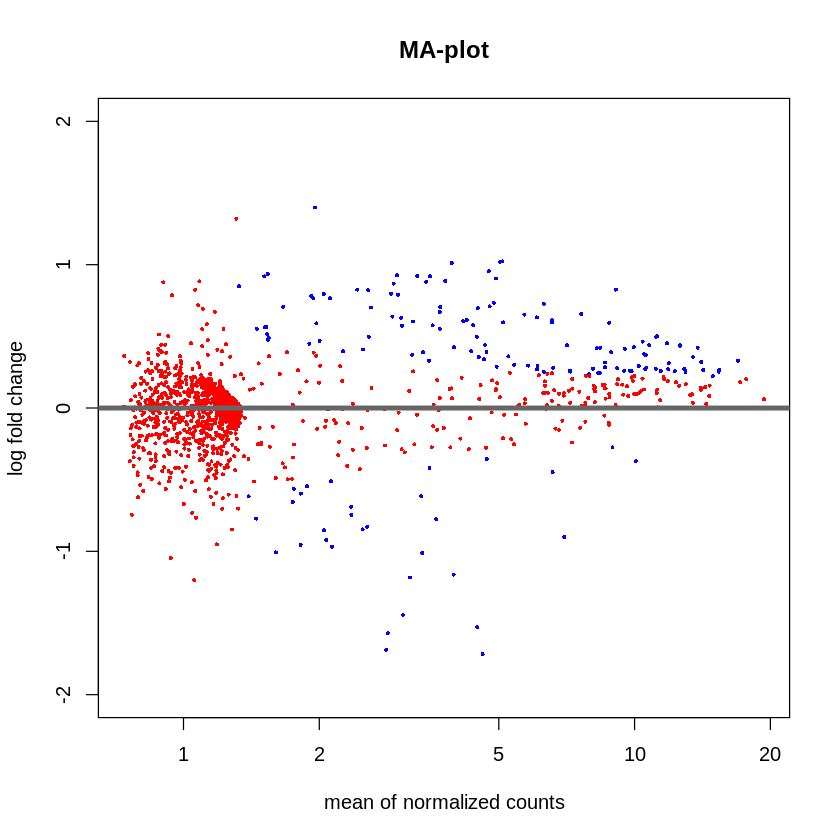

In [26]:
plot = plotMA(deseq_result, ylim=c(-2,2), main = "MA-plot", colNonSig = "red")

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;"></p>
<p class="last"> MA-plot aims to represent the comparison of mean(x-axis) normalized counts[baseMean] and FoldChange (y-axis) from the result table which illustrate a few things.</p>
</div>
<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;"></p>
<p class="last"> The high level of variance presence of low count genes with low counts tend to have quite high fold changes but they don't tend to be significantly differentially expressed. Anything colour in red is just an adjusted p-value lower than 0.01 which is not been used to define DE-genes.</p>
</div>
<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;"></p>
<p class="last"> So here those genes with low expression tend to have to be more spread away from the Zero line [log-fold change] they tend to be significant, and genes with low counts don't tend to be robustly differently expressed and higher mean counts tend to be more likely to DE-genes.</p>
</div>


**volcano plot**

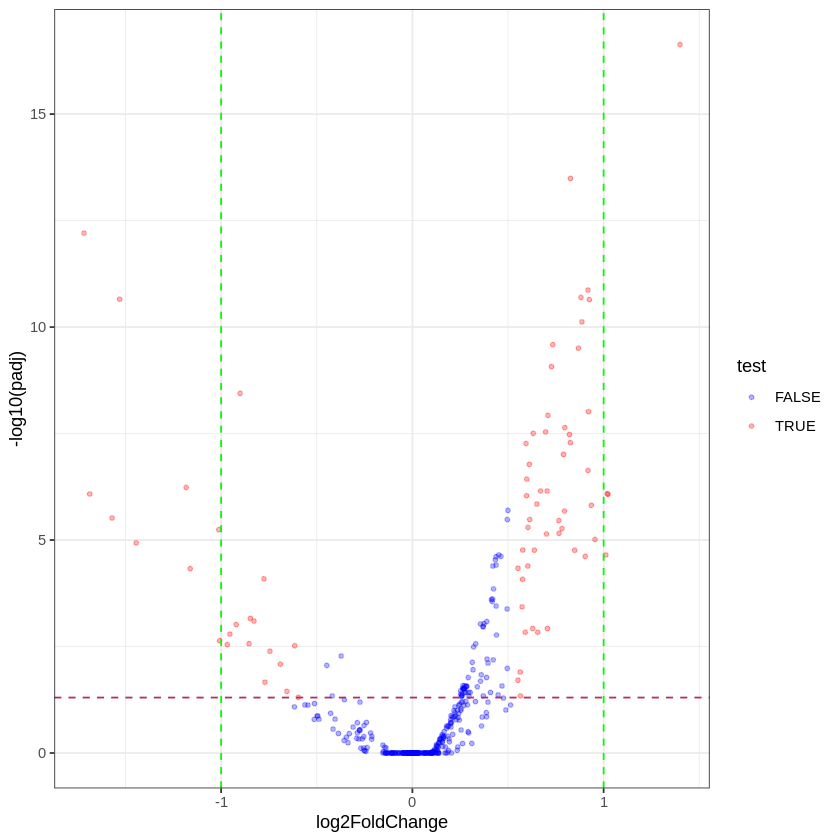

In [27]:
filter_df1$test = filter_df1$padj < 0.05 & abs(filter_df1$log2FoldChange) > 0.5 #combine test
ggplot(filter_df1, aes(x=log2FoldChange, y = -log10(padj))) +
geom_point(aes(colour = test ), size=1, alpha=0.3 )+
scale_colour_manual(values=c('blue','red')) +
geom_vline(xintercept = 1, colour="green", linetype=2) +
geom_vline(xintercept = -1, colour="green", linetype=2) +
geom_hline(yintercept = -log10(0.05),colour="maroon",  linetype=2) +
#theme(legend.position = "none")
#xlim(-3,3)+
#ylim(0,10)+
#ggplotly(g)
theme_bw()

**Below, Code is for Genes annotated Volcano Plot**

In [ ]:
install.packages("plotly")
library(plotly)

In [ ]:
#filter_df1$test = filter_df1$padj < 0.05 & abs(filter_df1$log2FoldChange) > 0.5
#filter_df1 = rownames_to_column(filter_df1, var = 'Genes')
#g = ggplot(filter_df1, aes(x=log2FoldChange, y = -log10(padj),name = ')) +
#geom_point(aes(colour = test ), size=1,alpha=0.3) +
#scale_colour_manual(values=c('blue' ,'red')) +
#geom_vline(xintercept = 1, colour="green", linetype=3)+
#geom_vline(xintercept = -1, colour="green", linetype=2)+
#geom_hline(yintercept = -log10(0.05),colour="blue",  linetype=2)+
#theme(legend.position = "none")
#xlim(-3,3)+
#ylim(0,10)+
#theme_bw()
#ggplotly(g)

**Saving the File**

In [20]:
write.csv(as.data.frame(filter_df3), file="con_vs_tum_3.csv") #save the final result.